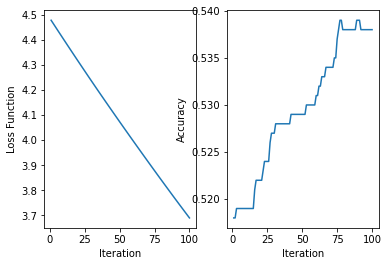

In [60]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)
lam = 0.1
n = 1000
d = 100
n_step = 100
step_size = 0.01

def loss(w, x, y, lam) :
    height, width = x.shape
    s = 0
    for i in range(height) :
        s += max(0, 1-y[i] * np.dot(w, x[i]))
    s /= height
    s += lam / 2 * np.linalg.norm(w)
    return s

def accuracy(w, x, y) : 
    height= y.shape[0]
    res = np.sign(np.matmul(x, w))
    correct = sum(np.equal(res, y))
    return correct / height

def subgradient(w, x, y, lam) :
    height= y.shape[0]
    d = w.shape[0]
    
    vec = np.zeros_like(w)
    for i in range(height) :
        xi = x[i]
        yi = y[i]
        if yi * (np.dot(xi,w)) < 1 :
            vec += -yi * xi
    vec /= height
        
    g = lam * w  + vec
    return g


X = np.vstack([np.random.normal(0.1, 1, (n//2, d)),
               np.random.normal(-0.1, 1, (n//2, d))])
y = np.hstack([np.ones(n//2), -1*np.ones(n//2)])
w0 = np.random.normal(0, 1, d)

w = w0

step = []
losses = []
accuracies = []

for i in range(n_step) :
    fun_val = loss(w = w, x = X, y = y, lam = lam)
    accur = accuracy(w = w, x = X, y = y)
    step.append(i+1)
    losses.append(fun_val)
    accuracies.append(accur)
    #print(accur)
    g = subgradient(w, X, y, lam)
    w = w - g * step_size

plt.subplot(1, 2, 1)
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.plot(step, losses)

plt.subplot(1, 2, 2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(step, accuracies)

plt.show()

In [49]:
y = np.hstack([np.ones(n//2), -1*np.ones(n//2)])
w0 = np.random.normal(0, 1, d)
h, w  = X.shape
h

1000

In [19]:
X = np.vstack([np.random.normal(0.1, 1, (n//2, d)),
               np.random.normal(-0.1, 1, (n//2, d))])

In [28]:
sum(np.equal(y, np.sign(np.matmul(X, w0))))

481

In [61]:
vec = np.zeros_like(w0)
vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
import autograd.numpy as np
from autograd import grad
np.random.seed(1337)

n = 5
A = np.random.normal(0, 1, (n, n))
S = A.dot(A.T)

ModuleNotFoundError: No module named 'autograd'